## **IMPORT REQUIRED MODULES**

In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

## **1.) LOAD THE DATASET**

In [2]:
cd /content/drive/MyDrive/IBM

/content/drive/MyDrive/IBM


In [27]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/1055

## **2.) IMAGE AUGUMENTATION**

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_data_generator = ImageDataGenerator( rescale = 1./255, zoom_range = 0.2, horizontal_flip = True, vertical_flip = True)

x_train = train_data_generator.flow_from_directory(r'/content/drive/MyDrive/IBM/flowers', target_size = (64,64), class_mode = 'categorical', batch_size = 100)

Found 4317 images belonging to 5 classes.


**Splitting the image dataset into training, testing and validation sets**

In [47]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  r'/content/drive/MyDrive/IBM/flowers',
  validation_split=0.2,
  subset="training",
  image_size=(180,180),
  seed=123,
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  r'/content/drive/MyDrive/IBM/flowers',
  validation_split=0.2,
  subset="validation",
  image_size=(180,180),
  seed=123,
  batch_size=32)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [43]:
indexes = train_ds.class_names

## **3.) CREATE MODEL**

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten

In [49]:
model = Sequential()

## **4.) ADD LAYERS**

In [50]:
model.add(Convolution2D (32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [51]:
model.add(MaxPooling2D (pool_size = (2, 2)))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(300, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [54]:
image_aug_acc = Sequential(
    [
        layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [55]:
num_classes = len(indexes)

model = Sequential([
  image_aug_acc,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## **5.) COMPILE THE MODEL**

In [56]:
model.compile(loss = 'Categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
len(x_train)

44

In [58]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## **6.) FIT THE MODEL**

In [70]:
model.fit(train_ds, validation_data = val_ds, epochs = 15 )

Epoch 1/15
108/108 [==============================] - 146s 1s/step - loss: 0.3410 - accuracy: 0.8706 - val_loss: 0.8249 - val_accuracy: 0.7486
Epoch 2/15
108/108 [==============================] - 146s 1s/step - loss: 0.3236 - accuracy: 0.8801 - val_loss: 0.8426 - val_accuracy: 0.7520
Epoch 3/15
108/108 [==============================] - 147s 1s/step - loss: 0.3096 - accuracy: 0.8816 - val_loss: 0.8538 - val_accuracy: 0.7451
Epoch 4/15
108/108 [==============================] - 143s 1s/step - loss: 0.2895 - accuracy: 0.8914 - val_loss: 0.9607 - val_accuracy: 0.7393
Epoch 5/15
108/108 [==============================] - 142s 1s/step - loss: 0.2668 - accuracy: 0.9036 - val_loss: 0.9359 - val_accuracy: 0.7543
Epoch 6/15
108/108 [==============================] - 141s 1s/step - loss: 0.2478 - accuracy: 0.9111 - val_loss: 0.9532 - val_accuracy: 0.7428
Epoch 7/15
108/108 [==============================] - 141s 1s/step - loss: 0.2697 - accuracy: 0.8995 - val_loss: 0.9214 - val_accuracy: 0.7590

## **7.) SAVE THE MODEL**

In [81]:
model.save('flowers.h1')

## **8.) TEST THE MODEL**

In [72]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [92]:
model2 = load_model('flowers.h1')

In [94]:
img = image.load_img(r'/content/drive/MyDrive/IBM/flowers/rose/118974357_0faa23cce9_n.jpg', target_size = (180,180) )

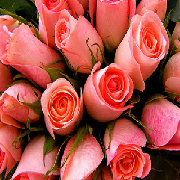

In [95]:
img

In [96]:
label = x_train.class_indices.keys()

In [97]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [98]:
p = model2.predict(x)

1/1 [==============================] - 0s 107ms/step


In [108]:
label = list(x_train.class_indices.keys())

pred_label = label[np.argmax(p)]
print("Predicted Label: {}".format(pred_label))

Predicted Label: rose
